# Sensitivity

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../src')
from emagpy import Problem
import numpy as np
import matplotlib.pyplot as plt

2/30 data removed (filterRange).


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


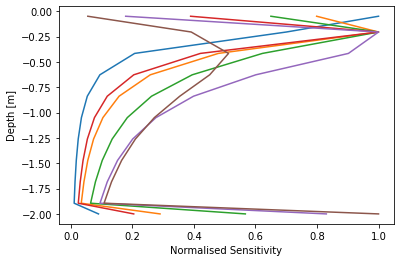

In [8]:
k = Problem()
k.createSurvey('../src/examples/cover-crop/coverCropTransect.csv')
k.filterRange(vmax=50)
k.setInit(depths0=np.linspace(0.1, 2, 10))
k.depths = k.depths0.copy() # need to specify initial model to compute sensitivity
k.models = k.conds0.copy()
sens = k.computeSens()

depth = k.depths[0][0,:]
mdepths = np.r_[depth[0]/2, depth[:-1] + np.diff(depth)/2, depth[-1]]
fig, ax = plt.subplots()
ax.plot(sens[0][:,:,0], -mdepths)
ax.set_xlabel('Normalised Sensitivity')
ax.set_ylabel('Depth [m]')
fig.show()


Survey 1/1
28/28 inverted


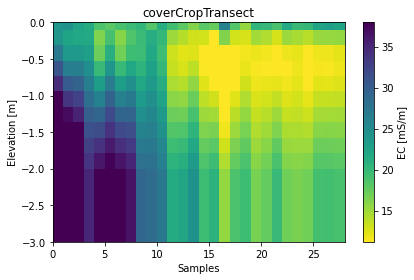

In [9]:
k.invert(forwardModel='CS', method='Gauss-Newton', alpha=0.07, regularization='l2')
k.showResults()

Survey 1/1
28/28 inverted
[0.94392045 1.47914455 1.52668667 2.05300504 1.92802552 2.02204484
 1.99260715 1.46048602 2.20771289 3.58411838]
Survey 1/1
28/28 inverted
[1.0371098  1.68689508 1.63151174 2.0768699  2.17766818 2.06566235
 2.26572151 1.60130176 2.25794889 3.623228  ]


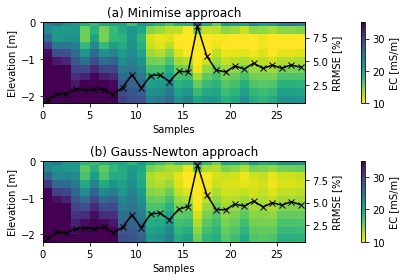

In [22]:
fig, axs = plt.subplots(2, 1)
ax = axs[0]
k.invert(forwardModel='CS', method='L-BFGS-B', alpha=0.07, regularization='l2')
k.showResults(index=0, ax=ax, vmin=10, vmax=35, maxDepth=2.2, rmse=True)
ax.set_title('(a) Minimise approach')

ax = axs[1]
k.invert(forwardModel='CS', method='Gauss-Newton', alpha=0.07, regularization='l2')
k.showResults(index=0, ax=ax, vmin=10, vmax=35, maxDepth=2.2, rmse=True)
ax.set_title('(b) Gauss-Newton approach')

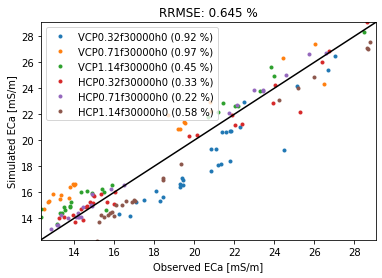

In [23]:
k.showOne2one()